In [ ]:
import math

def erf_series(x, tol=1e-10, max_iter=100):
    sum_val = 0.0
    n = 0

    while n < max_iter:
        term = ((-1)**n) * (x**(2*n+1)) / (math.factorial(n) * (2*n+1))
        sum_val += term

        # Check for convergence: if the next term is smaller than tol, stop.
        if abs(term) < tol:
            break

        n += 1

    return (2 / math.sqrt(math.pi)) * sum_val

# Example usage:
if __name__ == "__main__":
    x_val = 1.0
    approx = erf_series(x_val)
    print("erf({}) ≈ {}".format(x_val, approx))

    # For comparison, Python 3.2+ provides math.erf
exact = math.erf(x_val)
print("math.erf({}) = {}".format(x_val, exact))



erf(1.0) ≈ 0.8427007929560061
math.erf(1.0) = 0.8427007929497149


     x      erf_series(x)   iterations
 0.000       0.0000000000            1
 0.102       0.1147423489            5
 0.204       0.2271239943            6
 0.306       0.3349289404            7
 0.408       0.4362159236            8
 0.510       0.5294211425            9
 0.612       0.6134248531           10
 0.714       0.6875777888           11
 0.816       0.7516883922           12
 0.918       0.8059762884           13
 1.020       0.8510006730           14
 1.122       0.8875739755           15
 1.224       0.9166712415           16
 1.327       0.9393443882           17
 1.429       0.9566482487           18
 1.531       0.9695826344           19
 1.633       0.9790519847           20
 1.735       0.9858419278           21
 1.837       0.9906104481           23
 1.939       0.9938904394           24
 2.041       0.9961001392           25
 2.143       0.9975581656           26
 2.245       0.9985004218           28
 2.347       0.9990968307           29
 2.449       0.9994665658

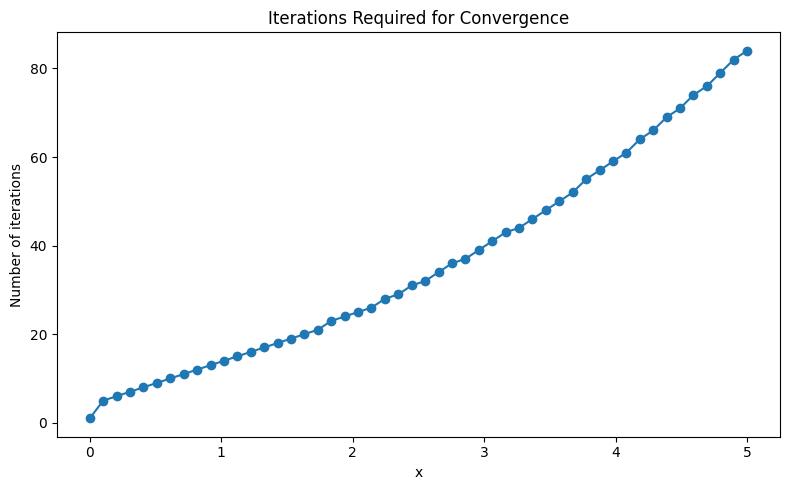

In [30]:
import math
import numpy as np
import matplotlib.pyplot as plt

def erf_series(x, tol=1e-10, max_iter=100):
    sum_val = 0.0
    n = 0
    iterations = 0
    while n < max_iter:
        term = ((-1)**n) * (x**(2*n+1)) / (math.factorial(n) * (2*n+1))
        sum_val += term
        iterations += 1
        if abs(term) < tol:
            break
        n += 1
    return (2 / math.sqrt(math.pi)) * sum_val, iterations

# Generate a range of x values (using nonnegative x for simplicity)
x_values = np.linspace(0, 5, 50)  # 50 values between 0 and 3
erf_values = []
iter_counts = []

for x in x_values:
    approx, iter_count = erf_series(x)
    erf_values.append(approx)
    iter_counts.append(iter_count)

# Print a table of results
print("{:>6} {:>18} {:>12}".format("x", "erf_series(x)", "iterations"))
for i in range(len(x_values)):
    print("{:6.3f} {:18.10f} {:12d}".format(x_values[i], erf_values[i], iter_counts[i]))

# Plot x versus number of iterations required
plt.figure(figsize=(8, 5))
plt.plot(x_values, iter_counts, marker='o', linestyle='-')
plt.xlabel("x")
plt.ylabel("Number of iterations")
plt.title("Iterations Required for Convergence")
plt.tight_layout()
plt.show()







The oscillatory pattern in the absolute error graph results from the truncation of an alternating series, combined with the increasing number of terms required for larger x. This is a natural behavior of Maclaurin series approximations for functions like erf(x).

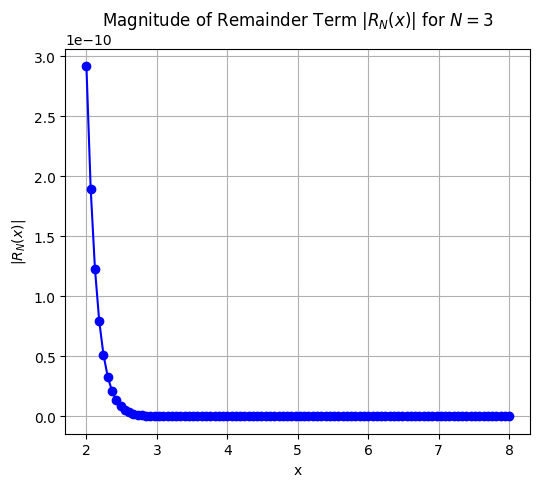

In [48]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def double_factorial(n):
    """Return the double factorial of n (defined for odd integers as the product of
    all odd numbers down to 1)."""
    if n <= 0:
        return 1
    result = 1
    for i in range(n, 0, -2):
        result *= i
    return result

def remainder_RN(x, N):
    """
    Compute the remainder term R_N(x) for the asymptotic expansion of erfc(x):

    R_N(x) = (-1)^N * 2^(1-2N) / (N!*(2N)!) * ∫_x^∞ t^{-2N} e^{-t^2} dt
    """
    prefactor = ((-1)**N * 2**(1-2*N)) / (math.factorial(N) * math.factorial(2*N))

    # Define the integrand: t^{-2N} * e^{-t^2}
    def integrand(t):
        return t**(-2*N) * math.exp(-t**2)

    integral_value, _ = quad(integrand, x, np.inf)
    return prefactor * integral_value

# Define a range of x values (where the asymptotic expansion is applicable)
x_values = np.linspace(2, 8, 100)
N_terms = 3  # Fixed number of terms used in the expansion

# Compute the remainder term R_N(x) for each x in the range
remainder_values = np.array([remainder_RN(x, N_terms) for x in x_values])
# Take the absolute value of the remainder
abs_remainder_values = np.abs(remainder_values)

# Plot the magnitude of the remainder term as a function of x
plt.figure(figsize=(6, 5))
plt.plot(x_values, abs_remainder_values, marker='o', linestyle='-', color='blue')
plt.xlabel('x')
plt.ylabel(r'$|R_N(x)|$')
plt.title(r'Magnitude of Remainder Term $|R_N(x)|$ for $N=%d$' % N_terms)
plt.grid(True)
plt.show()



Further analysis that didn't make it into the report using the math erf and erfc function:

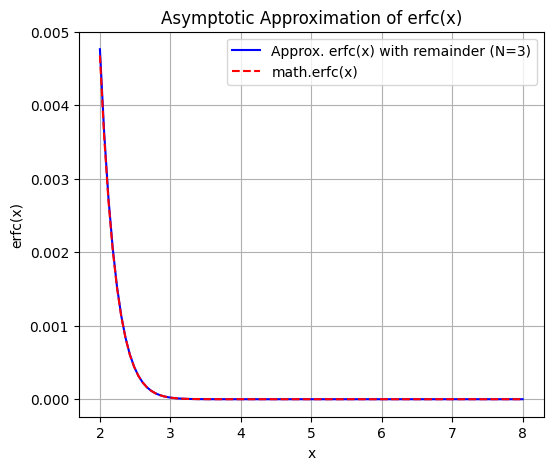

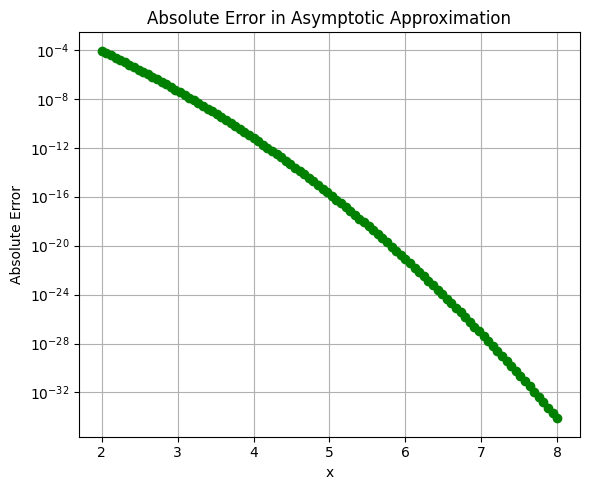

In [40]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def double_factorial(n):
    """Return the double factorial of n (defined for odd integers as the product of all odd numbers down to 1)."""
    if n <= 0:
        return 1
    result = 1
    for i in range(n, 0, -2):
        result *= i
    return result

def asymptotic_erfc_series(x, N):
    """
    Compute the partial sum S_N(x) of the asymptotic expansion for erfc(x):

    S_N(x) = e^{-x^2} / (x * sqrt(pi)) * sum_{n=0}^{N-1} [(-1)^n * (2n-1)!!] / (2x^2)^n
    """
    sum_series = 0.0
    for n in range(N):
        coeff = 1 if n == 0 else double_factorial(2*n - 1)
        term = ((-1)**n * coeff) / ((2 * x**2)**n)
        sum_series += term
    return (math.exp(-x**2) / (x * math.sqrt(math.pi))) * sum_series

def remainder_RN(x, N):
    """
    Compute the remainder term R_N(x) for the asymptotic expansion of erfc(x):

    R_N(x) = (-1)^N * 2^(1-2N) / (N!*(2N)!) * ∫_x^∞ t^{-2N} e^{-t^2} dt
    """
    prefactor = ((-1)**N * 2**(1-2*N)) / (math.factorial(N) * math.factorial(2*N))

    # Define the integrand: t^{-2N} * e^{-t^2}
    def integrand(t):
        return t**(-2*N) * math.exp(-t**2)

    integral_value, _ = quad(integrand, x, np.inf)
    return prefactor * integral_value

def asymptotic_erfc_with_remainder(x, N):
    """
    Compute erfc(x) using the asymptotic expansion with the remainder term:

    erfc(x) ≈ S_N(x) + R_N(x)
    """
    S_N = asymptotic_erfc_series(x, N)
    R_N_val = remainder_RN(x, N)
    return S_N + R_N_val

# Define a range of x values where the asymptotic expansion is applicable (large x)
x_values = np.linspace(2, 8, 100)
N_terms = 3  # Number of terms in the series (and remainder computed with N_terms)

# Compute approximations with the asymptotic expansion (including the remainder)
approx_erfc = np.array([asymptotic_erfc_with_remainder(x, N_terms) for x in x_values])
# Compute exact values using math.erfc for comparison
exact_erfc = np.array([math.erfc(x) for x in x_values])
# Compute the absolute error
error = np.abs(approx_erfc - exact_erfc)

# Plot the asymptotic approximation vs. the exact value
plt.figure(figsize=(6, 5))
plt.plot(x_values, approx_erfc, label=f'Approx. erfc(x) with remainder (N={N_terms})', color='blue')
plt.plot(x_values, exact_erfc, label='math.erfc(x)', color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('erfc(x)')
plt.title('Asymptotic Approximation of erfc(x)')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(6, 5))
plt.plot(x_values, error, marker='o', linestyle='-', color='green')
plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.yscale('log')
plt.title('Absolute Error in Asymptotic Approximation')
plt.grid(True)
plt.tight_layout()

plt.show()
